### Most In Demand skills for data analyst,data scientist,data engineer

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

In [6]:
#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_us = df[df['job_country']=='United States']
df_us_explode = df_us.explode('job_skills')

In [20]:
df_skills_count = df_us_explode.groupby(['job_skills','job_title_short']).size()
#resetting the index and renemaing tyhe valeus column to skill_count
#group by ouput to dataframe using .reset_index()
df_skills_count = df_skills_count.reset_index(name='skill_count')
#sort values by skill_coungt
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [27]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[0:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

In [58]:
#merge this with df_skills_count
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='job_total')
df_skills_perc = pd.merge(df_job_title_count,df_skills_count,on='job_title_short',how='right')

df_skills_perc['skill_perc'] = 100*df_skills_perc['skill_count']/df_skills_perc['job_total']
df_skills_perc

,job_title_short,job_total,job_skills,skill_count,skill_perc
0,Data Scientist,58830,python,42379,72.036376
1,Data Analyst,67816,sql,34452,50.802171
2,Data Scientist,58830,sql,30034,51.052184
3,Data Analyst,67816,excel,27519,40.578919
4,Data Scientist,58830,r,26022,44.232534
...,...,...,...,...,...
1865,Software Engineer,1814,clojure,1,0.055127
1866,Senior Data Scientist,12946,vb.net,1,0.007724
1867,Machine Learning Engineer,921,fortran,1,0.108578
1868,Cloud Engineer,423,planner,1,0.236407


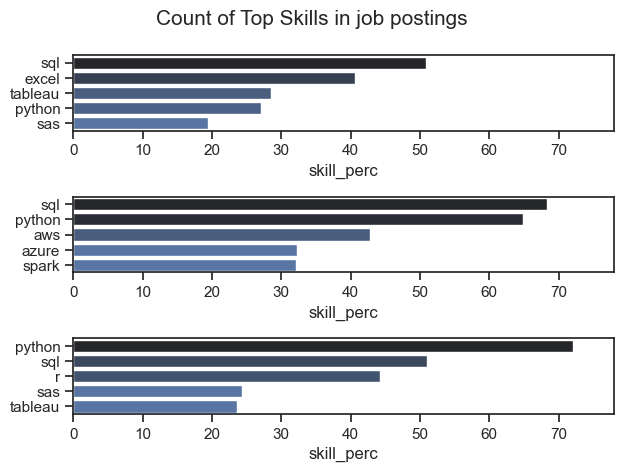

In [ ]:
fig,ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i,job_title in enumerate(job_titles):
    data=df_skills_perc[df_skills_perc['job_title_short']==job_title].head(5)
    # data.plot(kind='barh',x='job_skills',y='skill_perc',ax=ax[i],title=job_title)
    sns.barplot(data=data,x='skill_perc',y='job_skills',ax=ax[i],hue='skill_perc',palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    #plot the points using plt.text
    for idx,val in enumerate(data['skill_perc']):
        ax[i].text(val,idx,f'{v:}')

fig.suptitle('Count of Top Skills in job postings',fontsize=15)
plt.tight_layout()#for overlapping of subplots
plt.show()